In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import itertools

# Data analysis #

In [24]:
df = pd.read_csv("test_42.csv")

In [54]:
df.shape

(30220351, 22)

In [25]:
df.head(20)

,patient_id,timestamp,drug_0,drug_1,drug_2,drug_3,drug_4,drug_5,drug_6,drug_7,...,drug_10,drug_11,drug_12,drug_13,drug_14,drug_15,drug_16,drug_17,drug_18,hospit
0,0,2003-07-25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2003-09-08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2003-09-20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2003-09-26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2003-10-16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,2003-10-29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,2003-12-20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,2003-12-31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,2004-02-17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,2004-04-09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30220351 entries, 0 to 30220350
Data columns (total 22 columns):
 #   Column      Dtype         
---  ------      -----         
 0   patient_id  int64         
 1   timestamp   datetime64[ns]
 2   drug_0      int64         
 3   drug_1      int64         
 4   drug_2      int64         
 5   drug_3      int64         
 6   drug_4      int64         
 7   drug_5      int64         
 8   drug_6      int64         
 9   drug_7      int64         
 10  drug_8      int64         
 11  drug_9      int64         
 12  drug_10     int64         
 13  drug_11     int64         
 14  drug_12     int64         
 15  drug_13     int64         
 16  drug_14     int64         
 17  drug_15     int64         
 18  drug_16     int64         
 19  drug_17     int64         
 20  drug_18     int64         
 21  hospit      int64         
dtypes: datetime64[ns](1), int64(21)
memory usage: 5.0 GB


Parsing dates

In [27]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

Distribution des valeurs pour chaque drug

In [56]:
nb_patients = df['patient_id'].nunique()
avg_apparition = df['patient_id'].value_counts()

print("Nombres de patients dans le jeu de données :", nb_patients)
print("Nombre d'apparition moyenne par patient :", avg_apparition)

Nombres de patients dans le jeu de données : 3000000
Nombre d'apparition moyenne par patient : 295006     40
182414     40
182511     40
182510     40
182508     40
           ..
2680987     1
2082819     1
2082823     1
2408212     1
1471264     1
Name: patient_id, Length: 3000000, dtype: int64


Checkin noise on data

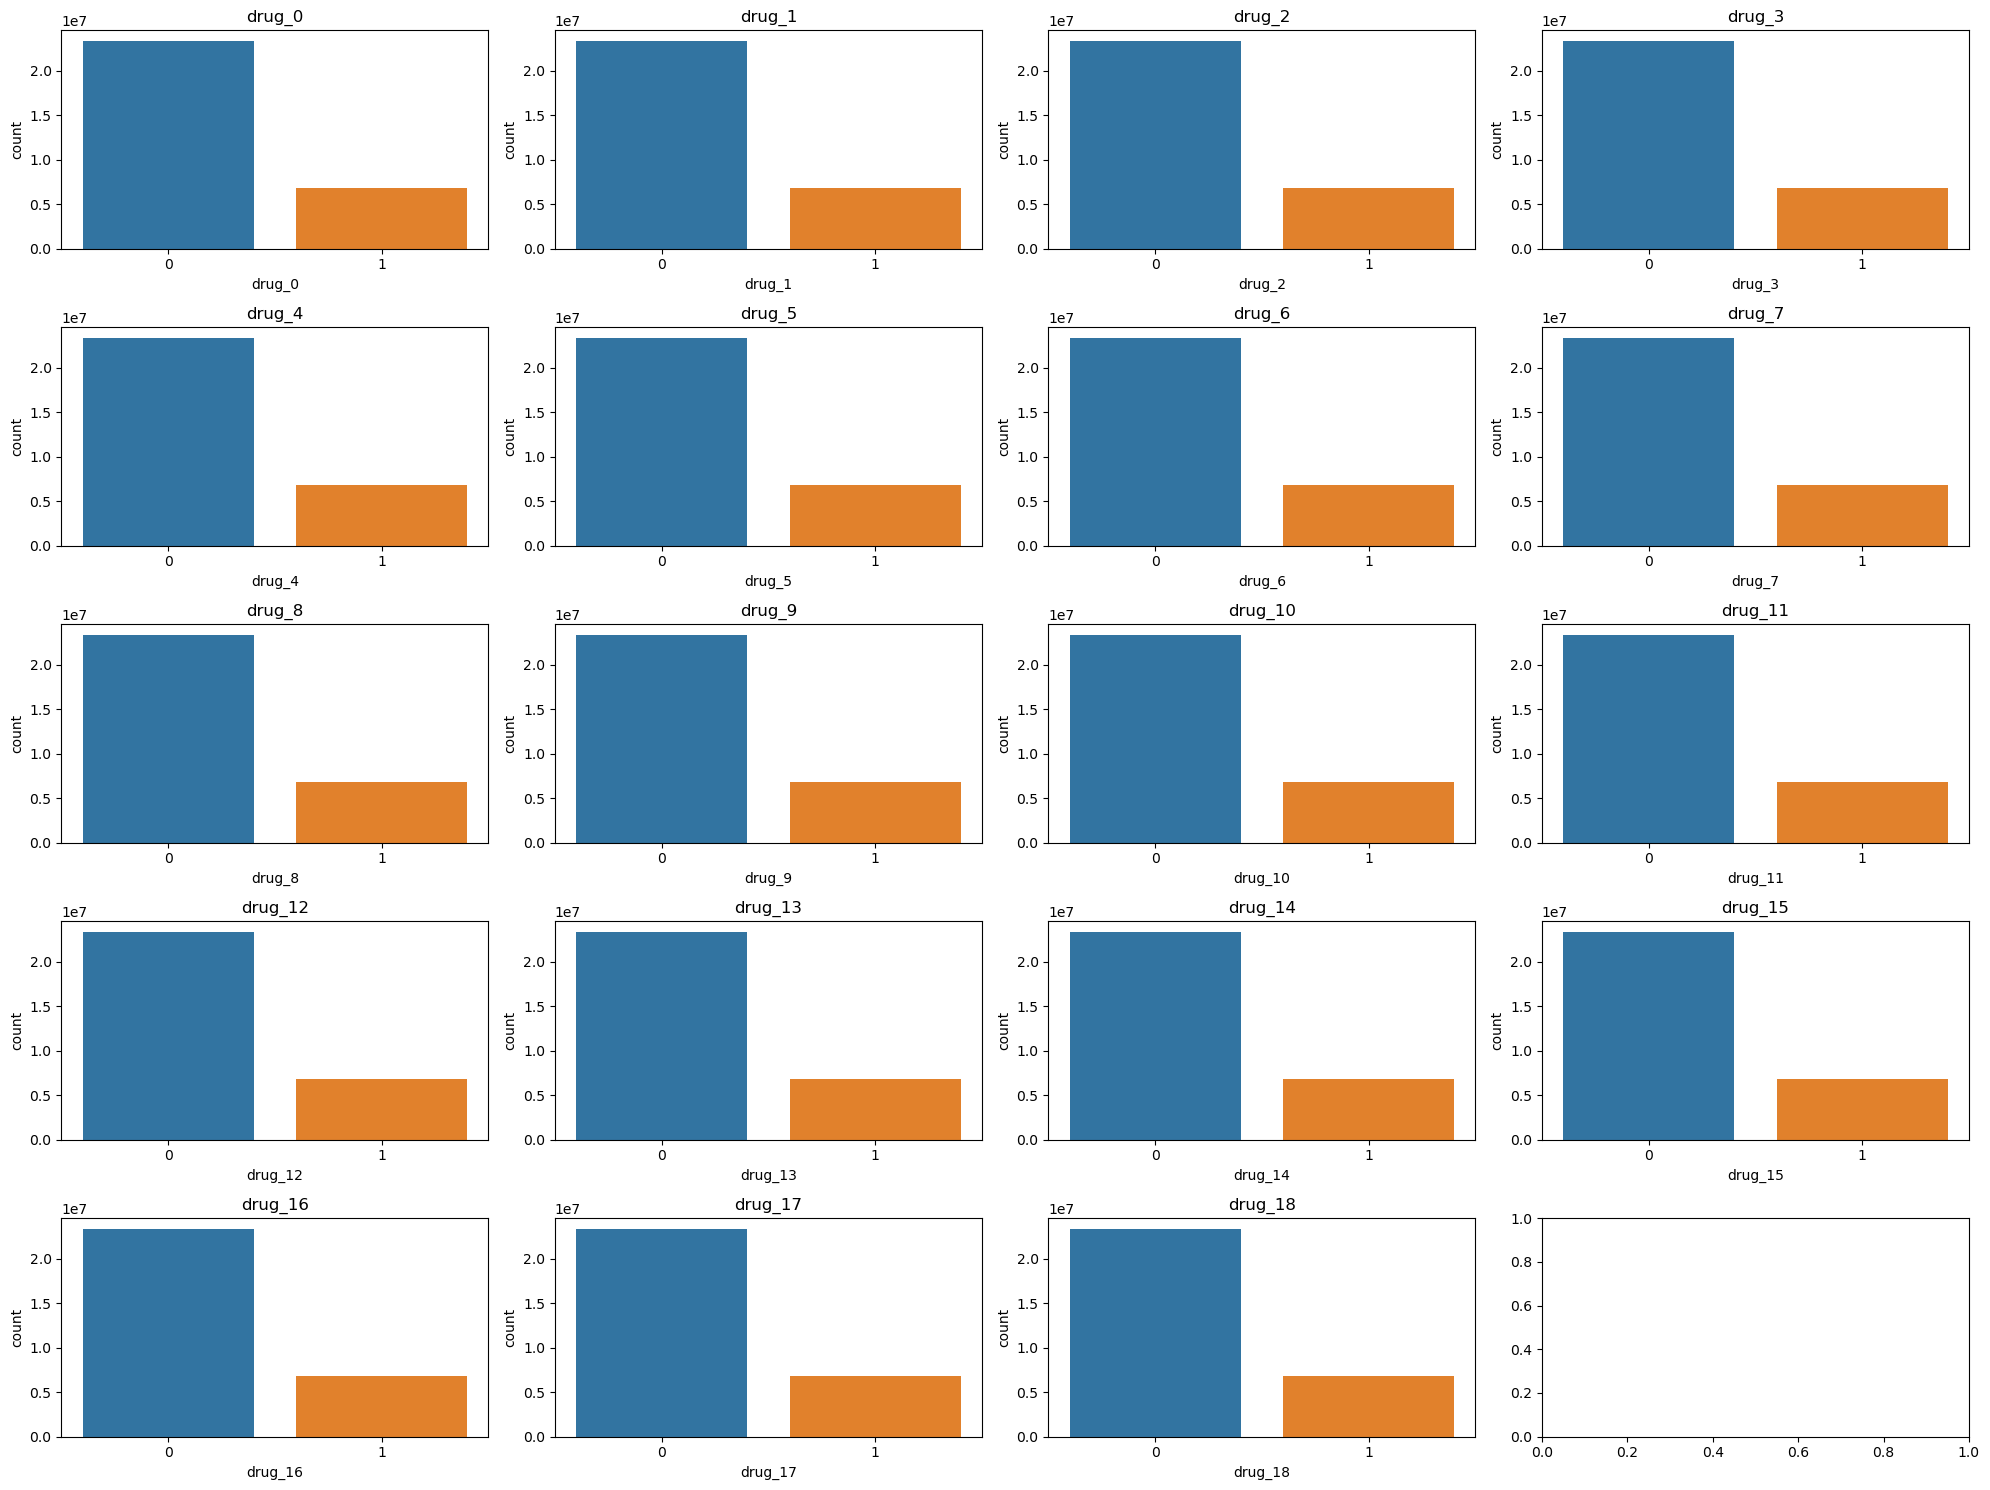

In [36]:
fig, ax = plt.subplots(5, 4, figsize=(20,15))
for i, col in enumerate(df.columns[2:21]):
    # Créer un countplot pour chaque colonne
    row = i // 4
    col1 = i % 4
    ax[row, col1].set_title(col)
    sns.countplot(x=col, data=df, ax=ax[row, col1])

plt.tight_layout()
plt.show()

### Problematic Data ###

#### Null values ####

In [57]:
df.isna().sum()

patient_id    0
timestamp     0
drug_0        0
drug_1        0
drug_2        0
drug_3        0
drug_4        0
drug_5        0
drug_6        0
drug_7        0
drug_8        0
drug_9        0
drug_10       0
drug_11       0
drug_12       0
drug_13       0
drug_14       0
drug_15       0
drug_16       0
drug_17       0
drug_18       0
hospit        0
dtype: int64

In [6]:
df.isnull().sum()

patient_id    0
timestamp     0
drug_0        0
drug_1        0
drug_2        0
drug_3        0
drug_4        0
drug_5        0
drug_6        0
drug_7        0
drug_8        0
drug_9        0
drug_10       0
drug_11       0
drug_12       0
drug_13       0
drug_14       0
drug_15       0
drug_16       0
drug_17       0
drug_18       0
hospit        0
dtype: int64

#### Class balance ####

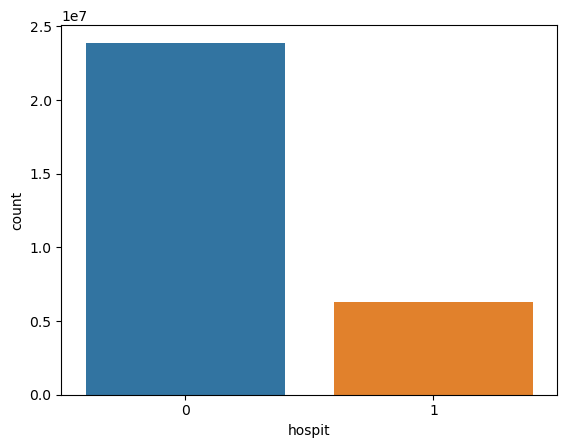

In [39]:
sns.countplot(x='hospit', data=df)
plt.show()

#### Duplicated values

Verification si pour un patient donnée nous n'avons pas deux observation à la même date

In [29]:
duplicates = df[df.duplicated(subset=["patient_id", "timestamp"])].sort_values(by=["patient_id", "timestamp"])
duplicates

,patient_id,timestamp,drug_0,drug_1,drug_2,drug_3,drug_4,drug_5,drug_6,drug_7,...,drug_10,drug_11,drug_12,drug_13,drug_14,drug_15,drug_16,drug_17,drug_18,hospit
3861000,32,2015-10-18,1,1,0,0,0,1,1,0,...,0,0,0,1,1,1,1,0,0,1
3861005,32,2016-04-29,1,0,0,1,1,1,1,0,...,1,1,0,1,1,1,1,1,0,0
3861434,85,2010-11-20,1,0,0,1,1,1,0,0,...,0,0,1,1,0,1,0,0,0,1
3862125,159,2002-04-06,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3862252,172,2009-03-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718463,439683,2013-11-24,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
7718520,439689,2017-11-18,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7718904,439733,2020-08-21,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
7720345,439883,2007-01-09,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0


In [60]:
df[(df['patient_id'] == 2296) & (df['timestamp'] == '2020-08-03')]

,patient_id,timestamp,drug_0,drug_1,drug_2,drug_3,drug_4,drug_5,drug_6,drug_7,...,drug_10,drug_11,drug_12,drug_13,drug_14,drug_15,drug_16,drug_17,drug_18,hospit
20209,2296,2020-08-03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3880917,2296,2020-08-03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
duplicates = df[df.duplicated()]
duplicates

,patient_id,timestamp,drug_0,drug_1,drug_2,drug_3,drug_4,drug_5,drug_6,drug_7,...,drug_10,drug_11,drug_12,drug_13,drug_14,drug_15,drug_16,drug_17,drug_18,hospit
3880917,2296,2020-08-03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3900502,4519,2016-11-16,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3901910,4691,2009-08-26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3908061,5371,2006-04-24,1,1,1,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,1
3915146,6203,2016-08-19,0,1,0,1,0,1,1,1,...,1,0,1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7682185,435499,2007-08-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7694744,436966,2018-10-06,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7717089,439531,2003-02-21,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7718520,439689,2017-11-18,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Correlation ####

Pearson

<AxesSubplot:>

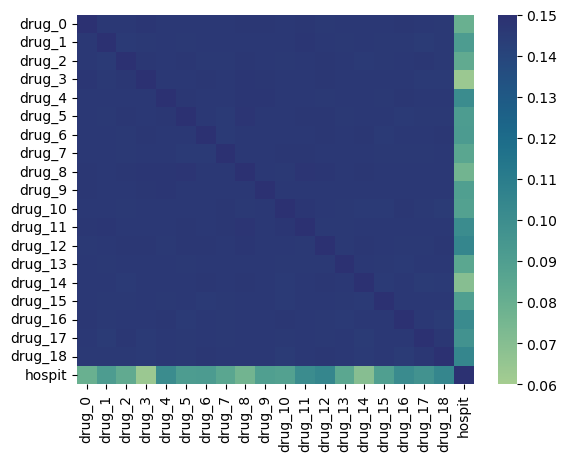

In [50]:
corr = df.iloc[:, 2:].corr(method='pearson')
sns.heatmap(corr, cmap="crest", vmax = 0.15, vmin = 0.06)

Chi 2

In [52]:
for col in df.iloc[:, 2:].columns:
    # Perform the chi-squared test of independence
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['hospit'], df[col]))
    
    # Print the results of the test
    print(f"Column: {col}")
    print(f"Chi-squared test statistic: {chi2:.2f}")
    print(f"p-value: {p:.2f}")

Column: drug_0
Chi-squared test statistic: 191796.13
p-value: 0.00
Column: drug_1
Chi-squared test statistic: 253309.63
p-value: 0.00
Column: drug_2
Chi-squared test statistic: 206905.53
p-value: 0.00
Column: drug_3
Chi-squared test statistic: 121313.13
p-value: 0.00
Column: drug_4
Chi-squared test statistic: 308490.66
p-value: 0.00
Column: drug_5
Chi-squared test statistic: 253711.00
p-value: 0.00
Column: drug_6
Chi-squared test statistic: 254320.08
p-value: 0.00
Column: drug_7
Chi-squared test statistic: 220126.44
p-value: 0.00
Column: drug_8
Chi-squared test statistic: 176334.38
p-value: 0.00
Column: drug_9
Chi-squared test statistic: 242970.09
p-value: 0.00
Column: drug_10
Chi-squared test statistic: 235309.87
p-value: 0.00
Column: drug_11
Chi-squared test statistic: 307789.01
p-value: 0.00
Column: drug_12
Chi-squared test statistic: 329189.93
p-value: 0.00
Column: drug_13
Chi-squared test statistic: 217062.19
p-value: 0.00
Column: drug_14
Chi-squared test statistic: 146525.59
p-va

Analyse de dissimilarité d'attributs binaires

In [65]:
def jaccard_similarity(x, y):
    intersection = len(set.intersection(*[set(x), set(y)]))
    union = len(set.union(*[set(x), set(y)]))
    return intersection / float(union)

def asymmetric_binary_dissimilarity(df, col1, col2):
    dissimilarity = 1 - jaccard_similarity(df[col1], df[col2])
    return dissimilarity

In [ ]:
dissimilarity_matrix = []
for i, col1 in enumerate(attributes):
    row = []
    for j, col2 in enumerate(attributes):
        dissimilarity = asymmetric_binary_dissimilarity(df, col1, col2)
        row.append(dissimilarity)
    dissimilarity_matrix.append(row)

dissimilarity_df = pd.DataFrame(dissimilarity_matrix, columns=attributes, index=attributes)
print(dissimilarity_df)

In [75]:
df.columns[2:21]

Index(['drug_0', 'drug_1', 'drug_2', 'drug_3', 'drug_4', 'drug_5', 'drug_6',
       'drug_7', 'drug_8', 'drug_9', 'drug_10', 'drug_11', 'drug_12',
       'drug_13', 'drug_14', 'drug_15', 'drug_16', 'drug_17', 'drug_18'],
      dtype='object')

In [22]:
df.columns[:-1]

Index(['patient_id', 'timestamp', 'drug_0', 'drug_1', 'drug_2', 'drug_3',
       'drug_4', 'drug_5', 'drug_6', 'drug_7', 'drug_8', 'drug_9', 'drug_10',
       'drug_11', 'drug_12', 'drug_13', 'drug_14', 'drug_15', 'drug_16',
       'drug_17', 'drug_18'],
      dtype='object')

Most accurate combinations 

In [26]:
def combination(df, nb_combinations):
    class1_data = df[df['hospit'] == nb_combinations]

    # trouvez toutes les combinaisons de deux attributs
    combinations = list(itertools.combinations(df.columns[2:21], nb_combinations))

    # Compter le nombre d'occurrences de chaque combinaison
    combination_counts = {}
    for combination in combinations:
        combination_df = df[list(combination)]
        combination_key = f"{combination[0]} & {combination[1]}"
        combination_counts[combination_key] = (combination_df == 1).all(axis=1).sum()

    # Trier les combinaisons par fréquence décroissante
    sorted_combination_counts = sorted(combination_counts.items(), key=lambda x: x[1], reverse=True)

    # Afficher les combinaisons les plus fréquentes
    print("Les combinaisons les plus fréquentes sont:")
    for combination, count in sorted_combination_counts[:15]:
        print(f"{combination}: {count}")

combination(df, 2)

Les combinaisons les plus fréquentes sont:
drug_8 & drug_11: 2333455
drug_8 & drug_12: 2330601
drug_1 & drug_11: 2330447
drug_5 & drug_8: 2329986
drug_4 & drug_9: 2329965
drug_8 & drug_9: 2329410
drug_4 & drug_8: 2329031
drug_10 & drug_11: 2328787
drug_1 & drug_8: 2328066
drug_0 & drug_8: 2327989
drug_6 & drug_9: 2327705
drug_6 & drug_8: 2327480
drug_0 & drug_9: 2327223
drug_9 & drug_11: 2326891
drug_3 & drug_8: 2326784
